In [1]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
import cv2
import supervision as sv

In [2]:
model = YOLO('yolo11m.pt')

In [3]:
results = model.predict('./humandetectionds/1/10.png')


image 1/1 c:\Users\Jalil\Desktop\Ecole\people-detection-traking\humandetectionds\1\10.png: 640x640 1 person, 2 bottles, 1 cup, 1 chair, 1 dining table, 513.2ms
Speed: 10.9ms preprocess, 513.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


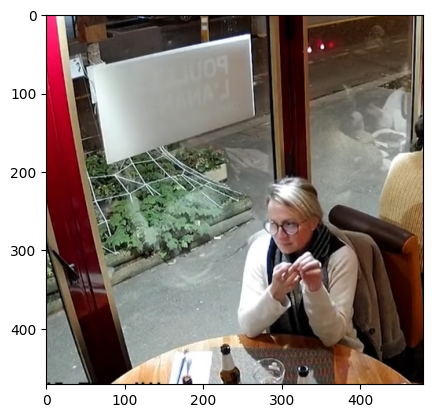

In [4]:
results = results[0]
classes = results.names
bbox = results.boxes.xyxy[0]
orig_img = results.orig_img
plt.imshow(results.orig_img[:,:,::-1])


In [5]:
print(classes)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw

In [6]:
def draw_squares(frame, bbox, track_id):
    x1, y1, x2, y2 = bbox
    cv2.rectangle(
        frame,
        (int(x1), int(y1)),
        (int(x2), int(y2)),
        color=(255, 0, 0),
        thickness=2
    )
    
    cv2.putText(
        frame,
        f'{track_id}',
        (int(x1 - 15), int(y1 + 5)),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.6,
        (255, 0, 0)
    )
    return frame

In [7]:
tracker = sv.ByteTrack()

In [8]:
def read_video(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    return frames


In [9]:

def save_video(frames, output_path):
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    
    out = cv2.VideoWriter(
        output_path,
        fourcc,
        30,
        (frames[0].shape[1], frames[0].shape[0])
    )
    
    for frame in frames:
        out.write(frame)
    out.release

In [10]:
frames = read_video('./video_2.mp4')

102 frames

In [12]:
detections = model.predict(frames)



0: 384x640 12 persons, 1 bicycle, 1 car, 2 motorcycles, 1 bus, 2 backpacks, 685.4ms
1: 384x640 14 persons, 1 bicycle, 1 car, 2 motorcycles, 1 bus, 2 backpacks, 685.4ms
2: 384x640 13 persons, 1 bicycle, 1 car, 2 motorcycles, 1 bus, 2 backpacks, 685.4ms
3: 384x640 15 persons, 1 bicycle, 1 car, 2 motorcycles, 1 bus, 2 backpacks, 685.4ms
4: 384x640 15 persons, 1 bicycle, 1 car, 1 motorcycle, 1 bus, 2 backpacks, 685.4ms
5: 384x640 15 persons, 2 bicycles, 1 car, 1 motorcycle, 1 bus, 1 backpack, 685.4ms
6: 384x640 14 persons, 1 bicycle, 1 car, 2 motorcycles, 1 bus, 2 backpacks, 685.4ms
7: 384x640 15 persons, 1 bicycle, 1 car, 1 motorcycle, 2 backpacks, 685.4ms
8: 384x640 14 persons, 1 bicycle, 1 car, 1 motorcycle, 2 backpacks, 2 potted plants, 685.4ms
9: 384x640 14 persons, 1 bicycle, 1 car, 1 motorcycle, 2 backpacks, 685.4ms
10: 384x640 13 persons, 1 bicycle, 1 car, 1 motorcycle, 1 bus, 1 backpack, 1 potted plant, 685.4ms
11: 384x640 13 persons, 1 bicycle, 1 car, 2 motorcycles, 1 bus, 1 bac

In [13]:
tracks= {
    'person' : [],
}

In [14]:
for frame_num, detection in enumerate(detections):
    class_names = detection.names
    class_names_inv = {v:k for k,v in class_names.items()}
    
    detection_sv = sv.Detections.from_ultralytics(detection)
    tracks['person'].append({})
    
    detection_tracks = tracker.update_with_detections(detection_sv)
    
    for frame_detection in detection_tracks:
        bbox = frame_detection[0].tolist()
        class_id = frame_detection[3]
        track_id = frame_detection[4]
        
        if class_id == class_names_inv['person']:
            tracks['person'][frame_num][int(track_id)] = {'bbox': bbox}

In [15]:
print(tracks['person'][0])

{2: {'bbox': [44.790794372558594, 241.9559326171875, 80.7247085571289, 352.5854187011719]}, 3: {'bbox': [164.235595703125, 181.50608825683594, 200.85037231445312, 286.8156433105469]}, 4: {'bbox': [602.5314331054688, 253.06396484375, 641.2899169921875, 354.0394287109375]}, 5: {'bbox': [487.70452880859375, 434.2057189941406, 520.3443603515625, 479.26153564453125]}, 6: {'bbox': [767.277587890625, 200.8751678466797, 801.7342529296875, 297.0283203125]}, 7: {'bbox': [464.59185791015625, 57.58649444580078, 492.2664794921875, 139.190673828125]}, 8: {'bbox': [0.08457300066947937, 390.5010070800781, 19.363548278808594, 478.3266296386719]}, 10: {'bbox': [489.56805419921875, 91.36854553222656, 514.3544921875, 171.66189575195312]}, 14: {'bbox': [103.01495361328125, 177.0039520263672, 130.05108642578125, 265.13360595703125]}, 15: {'bbox': [241.96507263183594, 63.4224739074707, 267.66900634765625, 144.02122497558594]}}


In [16]:
color_dict = {0: (255, 0, 0)}
output_video_frames = []
for frame_num, frame in enumerate(frames):
    frame = frame.copy()
    
    person_dict = tracks['person'][frame_num]
    
    for track_id, person in person_dict.items():
        bbox = person['bbox']
        frame = draw_squares(frame, person['bbox'], track_id)
        
    output_video_frames.append(frame)
    

In [17]:
save_video(output_video_frames, 'video_out2.mp4')

In [27]:
print(tracks['person'][1])

{37: {'bbox': [302.3415832519531, 170.54058837890625, 345.5315856933594, 275.69354248046875]}}
